In [5]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.dqn import DQN
from networks.lstm import LSTM

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch

In [2]:
norm_cols = ['open', 'high', 'low', 'close', f'Volume XRP']
cols = ['date'] + norm_cols
batch_dur = 30
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-05-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/vinay/code/git/smart-broker/notebooks/../environment.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
batch_size = 100
target_net = LSTM(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

policy_net = LSTM(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

dqn = DQN(
    env=env,
    env_type='vector',
    n_actions=3,
    log_freq=5,
    train_freq=3,
    batch_size=batch_size,
    w_sync_freq=10,
    memory_size=10000,
    gamma=0.995,
    step_size=0.01,
    episodes=500,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.SmoothL1Loss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.0001),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_lstm',
    network_type='lstm',
)

dqn.run(100)

collecting experience...
0..10..
Ep: 20 | L: 0.21 | R: 54050.66 | R.Avg.R: 54050.66 | P: 25 | R.Avg P: 25 | B: 111 | R.Avg B: 111, N_Units: 1538
Ep: 30 | L: 0.034 | R: 16789.57 | R.Avg.R: 31757.23 | P: 130 | R.Avg P: 106 | B: 34 | R.Avg B: 65, N_Units: 20385

KeyboardInterrupt: 

### Visualizations

### Traning

Text(0.5, 1.0, 'Average units held per episode')

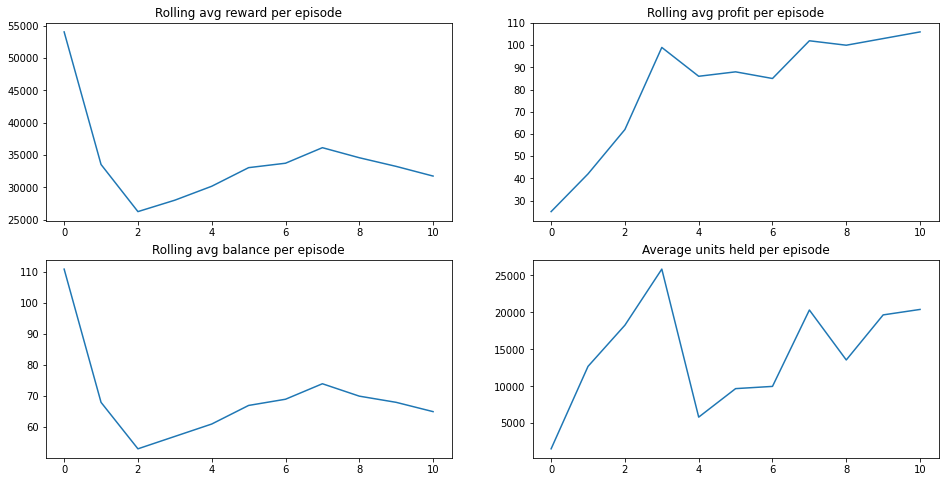

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
avg_units_held = []

for _, log in dqn.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    avg_units_held.append(log['avg_units_held'])

ax[0][0].plot(range(len(r_avg_rewards)), r_avg_rewards)
ax[0][0].set_title('Rolling avg reward per episode')

ax[0][1].plot(range(len(r_avg_profits)), r_avg_profits)
ax[0][1].set_title('Rolling avg profit per episode')

ax[1][0].plot(range(len(r_avg_bal)), r_avg_bal)
ax[1][0].set_title('Rolling avg balance per episode')

ax[1][1].plot(range(len(avg_units_held)), avg_units_held)
ax[1][1].set_title('Average units held per episode')